# A Simple KNN implementation in Python

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from knn import SimpleKNN

In [36]:
iris_data = load_iris()

data, targets = pd.DataFrame(iris_data.data, columns=iris_data.feature_names), pd.Series(iris_data.target, name='species')
# print(iris_data)

In [37]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

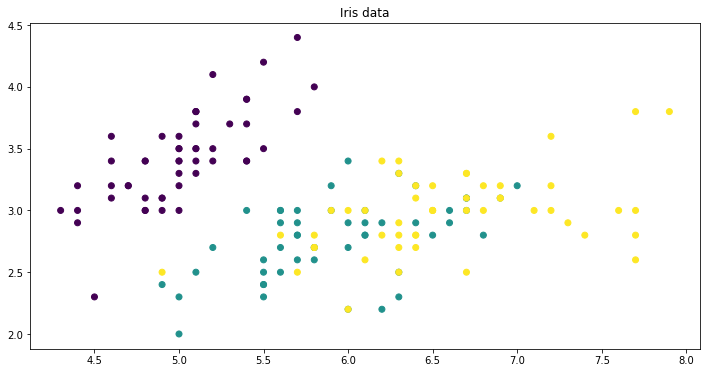

In [39]:
plt.figure(figsize=(12, 6))
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=iris_data.target)
plt.title("Iris data")
plt.show()

In [40]:
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

In [41]:
knn = SimpleKNN(n_neighbors=3)
knn.fit(x_train, y_train)

In [42]:
predictions = knn.predict(x_test)

print("Predictions: ", predictions)
print("Accuracy: ", accuracy_score(y_test, predictions))

Predictions:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy:  1.0


In [43]:
# Error Analysis for different K values
error_rate = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = SimpleKNN(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(f'Error rate for K={i:02} : {(error_rate[i - 1] * 100):.2f}%')

Error rate for K=01 : 0.00%
Error rate for K=02 : 0.00%
Error rate for K=03 : 0.00%
Error rate for K=04 : 0.00%
Error rate for K=05 : 0.00%
Error rate for K=06 : 0.00%
Error rate for K=07 : 3.33%
Error rate for K=08 : 0.00%
Error rate for K=09 : 0.00%
Error rate for K=10 : 0.00%
Error rate for K=11 : 0.00%
Error rate for K=12 : 0.00%
Error rate for K=13 : 0.00%
Error rate for K=14 : 0.00%
Error rate for K=15 : 0.00%
Error rate for K=16 : 0.00%
Error rate for K=17 : 0.00%
Error rate for K=18 : 0.00%
Error rate for K=19 : 0.00%
Error rate for K=20 : 0.00%
Error rate for K=21 : 0.00%
Error rate for K=22 : 0.00%
Error rate for K=23 : 0.00%
Error rate for K=24 : 0.00%
Error rate for K=25 : 0.00%
Error rate for K=26 : 0.00%
Error rate for K=27 : 0.00%
Error rate for K=28 : 0.00%
Error rate for K=29 : 0.00%
Error rate for K=30 : 0.00%
Error rate for K=31 : 0.00%
Error rate for K=32 : 0.00%
Error rate for K=33 : 0.00%
Error rate for K=34 : 0.00%
Error rate for K=35 : 0.00%
Error rate for K=36 

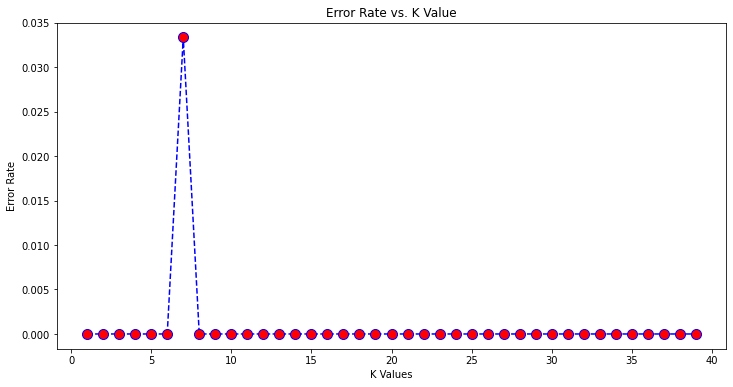

In [44]:
# Visualizing Error Rate vs K Value for KNN using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(
    range(1, 40), 
    error_rate, 
    color='#0000FF',
    linestyle='dashed', 
    marker='o', 
    markerfacecolor='#FF0000', 
    markersize=10
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.show()